In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dating_data_clean = pd.read_csv('dating_data_clean.csv')
dating_data_clean.shape

(8378, 74)

** Changing variables to category type **

In [289]:
dating_data_clean['match'] = dating_data_clean['match'].astype('category')
dating_data_clean['dec'] = dating_data_clean['dec'].astype('category')
dating_data_clean['dec_o'] = dating_data_clean['dec_o'].astype('category')

Random Forest algorithm was used in the different models that were explored below.

# Machine Learning

## 1) Predicting based on attributes importance at sign up


Each participant ranked the attributes (attractive, sincere, intelligent, ambitious, fun, shared interests) assigning a scale from 1 to 10 based on what is important for them in a partner. The values were normalized to a scale from 0 to 1.
12 features were used in this model: 6 attributes for each individual in a date 

**Training the model with 12 features (6 attributes each)**

In [290]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

# Using default values in RandomForest:

X = dating_data_clean[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']]
y = dating_data_clean['match']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

rf_all = RandomForestClassifier()

# Fit the random search model
rf_all.fit(X_train, y_train)

# Predicting values:
y_pred_all = rf_all.predict(X_test)


In [291]:
print(confusion_matrix(y_test, y_pred_all))
print(classification_report(y_test, y_pred_all))

[[1355   45]
 [ 253   23]]
             precision    recall  f1-score   support

          0       0.84      0.97      0.90      1400
          1       0.34      0.08      0.13       276

avg / total       0.76      0.82      0.77      1676



In [292]:
accuracy = rf_all.score(X_test, y_test)
accuracy

0.82219570405727926

Insight: low precision and very low recall for match = 1 (yes)

## 2) Distance between what's important for both participants

Each participant ranked the attributes (attractive, sincere, intelligent, ambitious, fun, shared interests) assigning a scale from 1 to 10 based on what is important for them in a partner. The values were normalized to a scale from 0 to 1. The distance between each attribute for 2 participants who met is calculated. A low distance may indicate the participants share the same opinion or value about that specific attribute. The model considers that the distance between participants in each attribute drives a match. 

**Calculating distances**

In [293]:
dis_att = abs(dating_data_clean['attr1_1'] - dating_data_clean['pf_o_att'])
dis_sinc = abs(dating_data_clean['sinc1_1'] - dating_data_clean['pf_o_sin'])
dis_intel = abs(dating_data_clean['intel1_1'] - dating_data_clean['pf_o_int'])
dis_fun = abs(dating_data_clean['fun1_1'] - dating_data_clean['pf_o_fun'])
dis_amb = abs(dating_data_clean['amb1_1'] - dating_data_clean['pf_o_amb'])
dis_sha = abs(dating_data_clean['shar1_1'] - dating_data_clean['pf_o_sha'])

In [294]:
dating_data_clean['dis_att'] = dis_att
dating_data_clean['dis_sinc'] = dis_sinc
dating_data_clean['dis_intel'] = dis_intel
dating_data_clean['dis_fun'] = dis_fun
dating_data_clean['dis_amb'] = dis_amb
dating_data_clean['dis_sha'] = dis_sha


**Training the model using default parameters**

In [295]:
X = dating_data_clean[['dis_att', 'dis_sinc', 'dis_intel', 'dis_fun', 'dis_amb', 'dis_sha']]
y = dating_data_clean['match']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

rf_dis = RandomForestClassifier()

# Fit the random search model
rf_dis.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Precting and evaluating the model**

In [296]:
y_pred_dis = rf_dis.predict(X_test)

In [297]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1365   35]
 [ 113  163]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1400
          1       0.82      0.59      0.69       276

avg / total       0.91      0.91      0.91      1676



In [298]:
accuracy = rf_dis.score(X_test, y_test)
accuracy

0.91169451073985686

Good improvement in precision and recall when using the distance instead of only the attributes.

**Training the model, setting n_estimators**

In [299]:
rf_dis = RandomForestClassifier(n_estimators=200)

# Fit the model
rf_dis.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [300]:
y_pred_dis = rf_dis.predict(X_test)

In [301]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1359   41]
 [  88  188]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1400
          1       0.82      0.68      0.74       276

avg / total       0.92      0.92      0.92      1676



In [302]:
accuracy = rf_dis.score(X_test, y_test)
accuracy

0.92303102625298328

Better precision, recall and accuracy than when using default hyperparameters.

**Training the model using Hyperparameter optimization - RandomSearchCV**

In [303]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 100)]

# Number of features to consider at every split
max_features = list(range(1, 6))

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 3, stop = 40, num = 38)]

random_grid = {'n_estimators': n_estimators,  'max_features': max_features,  'max_depth': max_depth}

rf_all = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf_all, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] .... n_estimators=125, max_features=4, max_depth=4, total=   0.7s
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] .... n_estimators=125, max_features=4, max_depth=4, total=   0.7s
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] .... n_estimators=125, max_features=4, max_depth=4, total=   0.7s
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s


[CV] ... n_estimators=134, max_features=3, max_depth=15, total=   1.4s
[CV] n_estimators=105, max_features=4, max_depth=36 ..................
[CV] ... n_estimators=134, max_features=3, max_depth=15, total=   1.4s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] ... n_estimators=134, max_features=3, max_depth=15, total=   1.4s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] ... n_estimators=134, max_features=3, max_depth=15, total=   1.4s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] ... n_estimators=105, max_features=4, max_depth=36, total=   1.4s
[CV] ... n_estimators=105, max_features=4, max_depth=36, total=   1.4s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] .... n_estimators=59, max_features=5, max_depth=11, total=   0.7s
[CV] n_estimators=54, max_features=5, max_depth=31 ...................
[CV] .

[CV] ... n_estimators=107, max_features=1, max_depth=13, total=   0.6s
[CV] n_estimators=140, max_features=1, max_depth=38 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   0.7s
[CV] n_estimators=140, max_features=1, max_depth=38 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   0.7s
[CV] n_estimators=140, max_features=1, max_depth=38 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   0.7s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   0.7s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   0.7s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] ... n_estimators=140, max_features=1, max_depth=38, total=   0.9s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] .

[CV] .... n_estimators=33, max_features=5, max_depth=38, total=   0.5s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] .... n_estimators=33, max_features=5, max_depth=38, total=   0.5s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] .... n_estimators=33, max_features=5, max_depth=38, total=   0.5s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.5s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.5s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.5s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.1s


[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.5s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.5s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   2.5s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   2.6s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   2.5s
[CV] n_estimators=82, max_features=4, max_depth=20 ...................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   2.5s
[CV] n_estimators=82, max_features=4, max_depth=20 ...................
[CV] ... n_estimators=182, max_features=4, max_depth=10, total=   1.8s
[CV] n_estimators=82, max_features=4, max_depth=20 ...................
[CV] .

[CV] .... n_estimators=73, max_features=3, max_depth=23, total=   0.8s
[CV] n_estimators=176, max_features=3, max_depth=34 ..................
[CV] ..... n_estimators=33, max_features=2, max_depth=8, total=   0.2s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] ..... n_estimators=33, max_features=2, max_depth=8, total=   0.2s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] ..... n_estimators=33, max_features=2, max_depth=8, total=   0.2s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] ... n_estimators=123, max_features=2, max_depth=37, total=   1.0s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] ... n_estimators=123, max_features=2, max_depth=37, total=   1.0s
[CV] ... n_estimators=123, max_features=2, max_depth=37, total=   1.0s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] n_estimators=21, max_features=3, max_depth=27 ...................
[CV] .

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   35.3s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127,...16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]},
          pre_dispatch='2*n_jobs', ran

In [304]:
rf_random.best_params_

{'max_depth': 38, 'max_features': 1, 'n_estimators': 140}

In [305]:
y_pred_dis = rf_random.predict(X_test)
sum(y_pred_dis)

225

In [306]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1363   37]
 [  88  188]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1400
          1       0.84      0.68      0.75       276

avg / total       0.92      0.93      0.92      1676



In [307]:
accuracy = rf_random.score(X_test, y_test)
accuracy

0.92541766109785206

Similar results than when using n_estimators = 200 and other default hyperparameters

## 3) Distance of self evaluation

Each participant evaluated themselves on 6 attributes (attractive, sincere, intelligent, ambitious, fun, shared interests) assigning a scale from 1 to 10 based on how they see themselves. The values were normalized to a scale from 0 to 1. The distance between each attribute for 2 participants who met is calculated. A low distance indicates the participants see themselves in a similar way for a specific attribute. The model considers that the distance between participants in each attribute drives a match. 

**Determining the self evaluation for all participants and merging it (not readily available in the Dataframe)**

In [308]:
dating_self = dating_data_clean[['iid', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].copy()
dating_self = dating_self.drop_duplicates()
dating_self

,iid,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
0,1,0.162162,0.216216,0.216216,0.216216,0.189189
10,2,0.212121,0.151515,0.242424,0.303030,0.090909
20,3,0.190476,0.214286,0.214286,0.190476,0.190476
30,4,0.179487,0.205128,0.179487,0.230769,0.205128
40,5,0.181818,0.090909,0.303030,0.181818,0.242424
50,6,0.147059,0.205882,0.264706,0.235294,0.147059
60,7,0.193548,0.193548,0.225806,0.161290,0.225806
70,8,0.200000,0.114286,0.228571,0.228571,0.228571
80,9,0.189189,0.162162,0.189189,0.270270,0.189189
90,10,0.153846,0.205128,0.153846,0.256410,0.230769


In [309]:
dating_data_self = dating_data_clean.merge(dating_self, how='inner', left_on = 'pid', right_on = 'iid')
dating_data_self

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


,iid_x,gender,idg,partner,pid,match,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,...,dis_intel,dis_fun,dis_amb,dis_sha,iid_y,attr3_1_y,sinc3_1_y,intel3_1_y,fun3_1_y,amb3_1_y
0,1,0,1,1,11,0,0.35,0.20,0.20,0.20,...,0.000000,0.050000,0.150000,0.100000,11,0.216216,0.243243,0.216216,0.189189,0.135135
1,2,0,3,1,11,0,0.35,0.20,0.20,0.20,...,0.050000,0.000000,0.000000,0.000000,11,0.216216,0.243243,0.216216,0.189189,0.135135
2,3,0,5,1,11,0,0.35,0.20,0.20,0.20,...,0.150000,0.100000,0.100000,0.050000,11,0.216216,0.243243,0.216216,0.189189,0.135135
3,4,0,7,1,11,0,0.35,0.20,0.20,0.20,...,0.000000,0.000000,0.100000,0.050000,11,0.216216,0.243243,0.216216,0.189189,0.135135
4,5,0,9,1,11,0,0.35,0.20,0.20,0.20,...,0.050000,0.050000,0.100000,0.100000,11,0.216216,0.243243,0.216216,0.189189,0.135135
5,6,0,11,1,11,0,0.35,0.20,0.20,0.20,...,0.000000,0.050000,0.050000,0.100000,11,0.216216,0.243243,0.216216,0.189189,0.135135
6,7,0,13,1,11,0,0.35,0.20,0.20,0.20,...,0.050000,0.000000,0.150000,0.050000,11,0.216216,0.243243,0.216216,0.189189,0.135135
7,8,0,15,1,11,0,0.35,0.20,0.20,0.20,...,0.072727,0.018182,0.181818,0.040909,11,0.216216,0.243243,0.216216,0.189189,0.135135
8,9,0,17,1,11,0,0.35,0.20,0.20,0.20,...,0.000000,0.100000,0.100000,0.050000,11,0.216216,0.243243,0.216216,0.189189,0.135135
9,10,0,19,1,11,0,0.35,0.20,0.20,0.20,...,0.050000,0.200000,0.100000,0.000000,11,0.216216,0.243243,0.216216,0.189189,0.135135


**Calculating distances**

In [310]:
dis_att = abs(dating_data_self['attr3_1_x'] - dating_data_self['attr3_1_y'])
dis_sinc = abs(dating_data_self['sinc3_1_x'] - dating_data_self['sinc3_1_y'])
dis_intel = abs(dating_data_self['intel3_1_x'] - dating_data_self['intel3_1_y'])
dis_fun = abs(dating_data_self['fun3_1_x'] - dating_data_self['fun3_1_y'])
dis_amb = abs(dating_data_self['amb3_1_x'] - dating_data_self['amb3_1_y'])

In [311]:
dating_data_self['dis_att_s'] = dis_att
dating_data_self['dis_sinc_s'] = dis_sinc
dating_data_self['dis_intel_s'] = dis_intel
dating_data_self['dis_fun_s'] = dis_fun
dating_data_self['dis_amb_s'] = dis_amb


**Training the model with default parameters**

In [312]:

X = dating_data_self[['dis_att_s', 'dis_sinc_s', 'dis_intel_s', 'dis_fun_s', 'dis_amb_s']]
y = dating_data_self['match']


In [313]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

rf_dis = RandomForestClassifier()

# Fit the random search model
rf_dis.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
y_pred_dis = rf_dis.predict(X_test)
sum(y_pred_dis)

178

In [315]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1384   16]
 [ 114  162]]
             precision    recall  f1-score   support

          0       0.92      0.99      0.96      1400
          1       0.91      0.59      0.71       276

avg / total       0.92      0.92      0.92      1676



In [316]:
accuracy = rf_dis.score(X, y)
accuracy

0.96598233468608263

**Training the model, setting n_estimators**

In [317]:
rf_dis = RandomForestClassifier(n_estimators=200)

# Fit the model
rf_dis.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [318]:
y_pred_dis = rf_dis.predict(X_test)

In [319]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1383   17]
 [  87  189]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      1400
          1       0.92      0.68      0.78       276

avg / total       0.94      0.94      0.93      1676



**Training the model using Hyperparameter optimization - RamdomizedSearchCV**

In [320]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 100)]

# Number of features to consider at every split
max_features = list(range(1, 6))

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 3, stop = 40, num = 38)]

random_grid = {'n_estimators': n_estimators,  'max_features': max_features,  'max_depth': max_depth}

rf_all = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf_all, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=192, max_features=3, max_depth=34 ..................
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] .... n_estimators=125, max_features=4, max_depth=4, total=   1.0s
[CV] .... n_estimators=125, max_features=4, max_depth=4, total=   1.0s
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] n_estimators=125, max_features=4, max_depth=4 ...................
[CV] .... n_estimators=125, max_features=4, max_depth=4, total=   1.0s
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.3s


[CV] ... n_estimators=134, max_features=3, max_depth=15, total=   2.1s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] ... n_estimators=134, max_features=3, max_depth=15, total=   2.1s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] ... n_estimators=134, max_features=3, max_depth=15, total=   2.1s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] .... n_estimators=59, max_features=5, max_depth=11, total=   1.1s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] ... n_estimators=105, max_features=4, max_depth=36, total=   2.3s
[CV] n_estimators=59, max_features=5, max_depth=11 ...................
[CV] .... n_estimators=59, max_features=5, max_depth=11, total=   1.1s
[CV] n_estimators=54, max_features=5, max_depth=31 ...................
[CV] ... n_estimators=105, max_features=4, max_depth=36, total=   2.3s
[CV] n_estimators=54, max_features=5, max_depth=31 ...................
[CV] .

[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   1.4s
[CV] n_estimators=140, max_features=1, max_depth=38 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   1.4s
[CV] n_estimators=140, max_features=1, max_depth=38 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   1.4s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   1.4s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] .... n_estimators=48, max_features=5, max_depth=15, total=   1.4s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] ... n_estimators=140, max_features=1, max_depth=38, total=   1.5s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] ... n_estimators=140, max_features=1, max_depth=38, total=   1.5s
[CV] n_estimators=194, max_features=4, max_depth=15 ..................
[CV] .

[CV] .... n_estimators=33, max_features=5, max_depth=38, total=   0.9s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] .... n_estimators=33, max_features=5, max_depth=38, total=   0.9s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.7s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.7s
[CV] n_estimators=117, max_features=1, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.7s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.0s


[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.7s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=117, max_features=1, max_depth=10, total=   0.7s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   4.1s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=182, max_features=4, max_depth=10, total=   2.8s
[CV] n_estimators=182, max_features=4, max_depth=10 ..................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   4.3s
[CV] n_estimators=82, max_features=4, max_depth=20 ...................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   4.3s
[CV] n_estimators=82, max_features=4, max_depth=20 ...................
[CV] ... n_estimators=190, max_features=4, max_depth=25, total=   4.3s
[CV] n_estimators=82, max_features=4, max_depth=20 ...................
[CV] .

[CV] ..... n_estimators=33, max_features=2, max_depth=8, total=   0.3s
[CV] n_estimators=176, max_features=3, max_depth=34 ..................
[CV] ..... n_estimators=33, max_features=2, max_depth=8, total=   0.3s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] .... n_estimators=73, max_features=3, max_depth=23, total=   1.3s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] .... n_estimators=73, max_features=3, max_depth=23, total=   1.3s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] ... n_estimators=123, max_features=2, max_depth=37, total=   1.6s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] ... n_estimators=123, max_features=2, max_depth=37, total=   1.5s
[CV] n_estimators=123, max_features=2, max_depth=37 ..................
[CV] ... n_estimators=123, max_features=2, max_depth=37, total=   1.6s
[CV] n_estimators=21, max_features=3, max_depth=27 ...................
[CV] .

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   53.6s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127,...16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]},
          pre_dispatch='2*n_jobs', ran

In [321]:
rf_random.best_params_

{'max_depth': 25, 'max_features': 3, 'n_estimators': 171}

In [322]:
y_pred_dis = rf_random.predict(X_test)
sum(y_pred_dis)

206

In [323]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1385   15]
 [  85  191]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      1400
          1       0.93      0.69      0.79       276

avg / total       0.94      0.94      0.94      1676



In [324]:
rf_random.score(X_test, y_test)

0.94033412887828161

Insight: 
- Similar results when randomizedsearchCV and n_estimators = 200
- distance between self evaluation gave better numbers than distance between important attributes

## 4) Distance of importance and distance of self evaluation

The distances between importance of attributes and self evaluation calculated and used separately in previous models were used in conjunction as features model #4. The model considers that the distances between what participants consider important (in each attribute) and the distance of how they see themselves (in each attribute) drive a match. 

**Training the model setting n_estimators**

In [325]:
X = dating_data_self[['dis_att', 'dis_sinc', 'dis_intel', 'dis_fun', 'dis_amb', 'dis_sha','dis_att_s', 'dis_sinc_s', 'dis_intel_s', 'dis_fun_s', 'dis_amb_s']]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

rf_dis = RandomForestClassifier()

In [326]:
rf_dis = RandomForestClassifier(n_estimators=200)

# Fit the model
rf_dis.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Predicting and evaluating**

In [327]:
y_pred_dis = rf_dis.predict(X_test)

In [328]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1397    3]
 [  70  206]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1400
          1       0.99      0.75      0.85       276

avg / total       0.96      0.96      0.95      1676



**Training the model with hyperparameter optimization - randomizedsearchCV**

In [329]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 150)]

# Number of features to consider at every split
max_features = list(range(1, 6))

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 3, stop = 50, num = 38)]

random_grid = {'n_estimators': n_estimators,  'max_features': max_features,  'max_depth': max_depth}

rf_all = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf_all, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=212, max_features=3, max_depth=42 ..................
[CV] n_estimators=212, max_features=3, max_depth=42 ..................
[CV] n_estimators=212, max_features=3, max_depth=42 ..................
[CV] n_estimators=212, max_features=3, max_depth=42 ..................
[CV] n_estimators=212, max_features=3, max_depth=42 ..................
[CV] n_estimators=97, max_features=1, max_depth=29 ...................
[CV] n_estimators=97, max_features=1, max_depth=29 ...................
[CV] n_estimators=97, max_features=1, max_depth=29 ...................
[CV] .... n_estimators=97, max_features=1, max_depth=29, total=   0.7s
[CV] .... n_estimators=97, max_features=1, max_depth=29, total=   0.7s
[CV] n_estimators=97, max_features=1, max_depth=29 ...................
[CV] n_estimators=97, max_features=1, max_depth=29 ...................
[CV] .... n_estimators=97, max_features=1, max_depth=29, total=   0.7s
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s


[CV] .... n_estimators=76, max_features=1, max_depth=22, total=   0.5s
[CV] n_estimators=76, max_features=1, max_depth=22 ...................
[CV] .... n_estimators=76, max_features=1, max_depth=22, total=   0.5s
[CV] n_estimators=142, max_features=3, max_depth=39 ..................
[CV] .... n_estimators=76, max_features=1, max_depth=22, total=   0.5s
[CV] n_estimators=142, max_features=3, max_depth=39 ..................
[CV] ... n_estimators=231, max_features=5, max_depth=22, total=   5.1s
[CV] ... n_estimators=231, max_features=5, max_depth=22, total=   5.1s
[CV] n_estimators=142, max_features=3, max_depth=39 ..................
[CV] n_estimators=142, max_features=3, max_depth=39 ..................
[CV] ... n_estimators=231, max_features=5, max_depth=22, total=   5.2s
[CV] .... n_estimators=76, max_features=1, max_depth=22, total=   0.5s
[CV] n_estimators=142, max_features=3, max_depth=39 ..................
[CV] n_estimators=233, max_features=2, max_depth=13 ..................
[CV] .

[CV] ..... n_estimators=78, max_features=2, max_depth=5, total=   0.4s
[CV] n_estimators=78, max_features=2, max_depth=5 ....................
[CV] ..... n_estimators=78, max_features=2, max_depth=5, total=   0.4s
[CV] n_estimators=78, max_features=2, max_depth=5 ....................
[CV] ..... n_estimators=78, max_features=2, max_depth=5, total=   0.4s
[CV] n_estimators=78, max_features=2, max_depth=5 ....................
[CV] ... n_estimators=150, max_features=1, max_depth=16, total=   1.0s
[CV] n_estimators=46, max_features=1, max_depth=4 ....................
[CV] ..... n_estimators=78, max_features=2, max_depth=5, total=   0.4s
[CV] n_estimators=46, max_features=1, max_depth=4 ....................
[CV] ... n_estimators=249, max_features=2, max_depth=29, total=   2.6s
[CV] n_estimators=46, max_features=1, max_depth=4 ....................
[CV] ... n_estimators=249, max_features=2, max_depth=29, total=   2.6s
[CV] n_estimators=46, max_features=1, max_depth=4 ....................
[CV] .

[CV] ... n_estimators=241, max_features=2, max_depth=36, total=   2.5s
[CV] n_estimators=68, max_features=4, max_depth=48 ...................
[CV] .... n_estimators=68, max_features=4, max_depth=48, total=   1.2s
[CV] n_estimators=68, max_features=4, max_depth=48 ...................
[CV] ... n_estimators=241, max_features=2, max_depth=36, total=   2.6s
[CV] n_estimators=68, max_features=4, max_depth=48 ...................
[CV] ... n_estimators=196, max_features=3, max_depth=13, total=   2.3s
[CV] n_estimators=68, max_features=4, max_depth=48 ...................
[CV] ... n_estimators=196, max_features=3, max_depth=13, total=   2.3s
[CV] n_estimators=68, max_features=4, max_depth=48 ...................
[CV] ... n_estimators=196, max_features=3, max_depth=13, total=   2.3s
[CV] n_estimators=235, max_features=3, max_depth=16 ..................
[CV] ... n_estimators=241, max_features=2, max_depth=36, total=   2.5s
[CV] n_estimators=235, max_features=3, max_depth=16 ..................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.8s


[CV] ... n_estimators=196, max_features=3, max_depth=13, total=   2.3s
[CV] n_estimators=235, max_features=3, max_depth=16 ..................
[CV] ... n_estimators=196, max_features=3, max_depth=13, total=   2.3s
[CV] n_estimators=235, max_features=3, max_depth=16 ..................
[CV] .... n_estimators=68, max_features=4, max_depth=48, total=   1.2s
[CV] n_estimators=235, max_features=3, max_depth=16 ..................
[CV] .... n_estimators=68, max_features=4, max_depth=48, total=   1.2s
[CV] n_estimators=25, max_features=2, max_depth=46 ...................
[CV] .... n_estimators=25, max_features=2, max_depth=46, total=   0.3s
[CV] .... n_estimators=68, max_features=4, max_depth=48, total=   1.2s
[CV] .... n_estimators=68, max_features=4, max_depth=48, total=   1.2s
[CV] n_estimators=25, max_features=2, max_depth=46 ...................
[CV] n_estimators=25, max_features=2, max_depth=46 ...................
[CV] n_estimators=25, max_features=2, max_depth=46 ...................
[CV] .

[CV] n_estimators=91, max_features=1, max_depth=38 ...................
[CV] n_estimators=202, max_features=3, max_depth=5 ...................
[CV] .... n_estimators=91, max_features=1, max_depth=38, total=   0.7s
[CV] n_estimators=202, max_features=3, max_depth=5 ...................
[CV] ... n_estimators=142, max_features=3, max_depth=34, total=   2.2s
[CV] n_estimators=202, max_features=3, max_depth=5 ...................
[CV] ... n_estimators=142, max_features=3, max_depth=34, total=   2.3s
[CV] n_estimators=202, max_features=3, max_depth=5 ...................
[CV] ... n_estimators=142, max_features=3, max_depth=34, total=   2.3s
[CV] n_estimators=202, max_features=3, max_depth=5 ...................
[CV] .... n_estimators=91, max_features=1, max_depth=38, total=   0.7s
[CV] .... n_estimators=91, max_features=1, max_depth=38, total=   0.7s
[CV] n_estimators=239, max_features=1, max_depth=43 ..................
[CV] n_estimators=239, max_features=1, max_depth=43 ..................
[CV] .

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 118, 120, 122, 124, 126, 128,...19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 50]},
          pre_dispatch='2*n_jobs', ran

In [330]:
rf_random.best_params_

{'max_depth': 29, 'max_features': 2, 'n_estimators': 249}

**Predicting and evaluating**

In [331]:
y_pred_dis = rf_random.predict(X_test)
sum(y_pred_dis)

209

In [332]:
print(confusion_matrix(y_test, y_pred_dis))
print(classification_report(y_test, y_pred_dis))

[[1397    3]
 [  70  206]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1400
          1       0.99      0.75      0.85       276

avg / total       0.96      0.96      0.95      1676



In [333]:
rf_random.score(X_test, y_test)

0.9564439140811456

Insights:
- Similar results when randomizedsearchCV and n_estimators = 200
- model #4 has the best precision and recall of all models explored before

## Matching flow (example for an existing customer)

Using model #4, the code below runs the match engine for participant iid = 115

In [334]:
## Create Dataset with important attributes and self ranking for each participant:

search_id = 115
dating_data_flow = dating_data_clean[['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]

In [335]:
dating_data_flow = dating_data_flow.drop_duplicates()

In [336]:
search_data = dating_data_flow.loc[dating_data_flow['iid'] == search_id,['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]

In [337]:
dating_data_flow = dating_data_flow.drop(dating_data_flow[dating_data_flow['iid'] == search_id].index, axis=0)

In [338]:
# Calculating differences for each attribute:
matching_temp = abs(np.subtract(dating_data_flow[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']], search_data[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]))
matching_temp['search_id'] = search_id
matching_temp['iid'] = dating_data_flow['iid']
matching_temp = matching_temp.rename(columns={'attr1_1':'dis_attr1', 'sinc1_1':'dis_sinc1', 'intel1_1':'dis_intel1', 'fun1_1':'dis_fun1', 'amb1_1':'dis_amb1', 'shar1_1':'dis_shar1', 'attr3_1':'dis_attr3', 'sinc3_1':'dis_sinc3', 'intel3_1':'dis_intel3', 'fun3_1':'dis_fun3', 'amb3_1':'dis_amb3'})

In [339]:
X_new = matching_temp.drop(['iid', 'search_id'], axis=1)

In [340]:
y_pred_match = rf_random.predict(X_new)

In [341]:
matching_temp['y_pred'] = y_pred_match

y_prob = rf_random.predict_proba(X_new)


matching_temp['y_pred_prob'] = y_prob[:,1]

matching_5 = matching_temp.sort_values(by=['y_pred', 'y_pred_prob'], ascending=[False, False]).head(5)
matching_5

,dis_attr1,dis_sinc1,dis_intel1,dis_fun1,dis_amb1,dis_shar1,dis_attr3,dis_sinc3,dis_intel3,dis_fun3,dis_amb3,search_id,iid,y_pred,y_pred_prob
1776,0.00,0.05,0.10,0.05,0.03,0.13,0.004545,0.038636,0.020455,0.027273,0.027273,115,125,1,0.900323
6428,0.05,0.10,0.00,0.00,0.10,0.05,0.200000,0.175000,0.225000,0.200000,0.200000,115,416,1,0.683400
1796,0.05,0.15,0.05,0.05,0.10,0.00,0.009524,0.015476,0.010714,0.014286,0.009524,115,127,1,0.668571
1806,0.20,0.05,0.20,0.00,0.05,0.00,0.016216,0.014189,0.008784,0.010811,0.010811,115,128,1,0.629593
6392,0.75,0.09,0.29,0.19,0.14,0.04,0.200000,0.175000,0.225000,0.200000,0.200000,115,414,1,0.602610


**Creating pool of matches**

Predict a match for all participants versus all participants to support a decision on what could be the meeting suggestions.

In [342]:
## Create Dataset with important attributes and self ranking for each participant:

dating_data_flow = dating_data_clean[['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]

In [343]:
dating_data_flow = dating_data_flow.drop_duplicates()
dating_data_flow2 = dating_data_flow.copy()

In [344]:
dating_data_flow['key'] = 0
dating_data_flow2['key'] = 0

dating_data_flow2 = dating_data_flow2.rename(columns={'iid':'iid_b', 'attr1_1':'attr1_1_b', 'sinc1_1':'sinc1_1_b', 'intel1_1':'intel1_1_b', 'fun1_1':'fun1_1_b', 'amb1_1':'amb1_1_b', 'shar1_1':'shar1_1_b', 'attr3_1':'attr3_1_b', 'sinc3_1':'sinc3_1_b', 'intel3_1':'intel3_1_b', 'fun3_1':'fun3_1_b', 'amb3_1':'amb3_1_b'})

df_all = dating_data_flow.merge(dating_data_flow2, how='outer')
df_all

,iid,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,intel3_1,...,sinc1_1_b,intel1_1_b,fun1_1_b,amb1_1_b,shar1_1_b,attr3_1_b,sinc3_1_b,intel3_1_b,fun3_1_b,amb3_1_b
0,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.200000,0.200000,0.150000,0.150000,0.150000,0.162162,0.216216,0.216216,0.216216,0.189189
1,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.050000,0.250000,0.200000,0.000000,0.050000,0.212121,0.151515,0.242424,0.303030,0.090909
2,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.100000,0.350000,0.100000,0.100000,0.000000,0.190476,0.214286,0.214286,0.190476,0.190476
3,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.200000,0.200000,0.200000,0.100000,0.100000,0.179487,0.205128,0.179487,0.230769,0.205128
4,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.050000,0.250000,0.250000,0.100000,0.150000,0.181818,0.090909,0.303030,0.181818,0.242424
5,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.250000,0.200000,0.250000,0.050000,0.150000,0.147059,0.205882,0.264706,0.235294,0.147059
6,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.150000,0.250000,0.200000,0.150000,0.100000,0.193548,0.193548,0.225806,0.161290,0.225806
7,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.181818,0.272727,0.181818,0.181818,0.090909,0.200000,0.114286,0.228571,0.228571,0.228571
8,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.100000,0.200000,0.300000,0.100000,0.100000,0.189189,0.162162,0.189189,0.270270,0.189189
9,1,0.15,0.2,0.20,0.15,0.15,0.15,0.162162,0.216216,0.216216,...,0.150000,0.150000,0.400000,0.100000,0.050000,0.153846,0.205128,0.153846,0.256410,0.230769


In [345]:
df_all = df_all.drop((df_all[df_all['iid'] == df_all['iid_b']]).index)

In [346]:
dis_att_1 = df_all['attr1_1'] - df_all['attr1_1_b']
dis_sinc_1 = df_all['sinc1_1'] - df_all['sinc1_1_b']
dis_intel_1 = df_all['intel1_1'] - df_all['intel1_1_b']
dis_fun_1 = df_all['fun1_1'] - df_all['fun1_1_b']
dis_amb_1 = df_all['amb1_1'] - df_all['amb1_1_b']
dis_shar_1 = df_all['shar1_1'] - df_all['shar1_1_b']
dis_att_3 = df_all['attr3_1'] - df_all['attr3_1_b']
dis_sinc_3 = df_all['sinc3_1'] - df_all['sinc3_1_b']
dis_intel_3 = df_all['intel3_1'] - df_all['intel3_1_b']
dis_fun_3 = df_all['fun3_1'] - df_all['fun3_1_b']
dis_amb_3 = df_all['amb3_1'] - df_all['amb3_1_b']
df_all['dis_att_1'] = dis_att_1
df_all['dis_sinc_1'] = dis_sinc_1
df_all['dis_intel_1'] = dis_intel_1
df_all['dis_fun_1'] = dis_fun_1
df_all['dis_amb_1'] = dis_amb_1
df_all['dis_shar_1'] = dis_shar_1
df_all['dis_att_3'] = dis_att_3
df_all['dis_sinc_3'] = dis_sinc_3
df_all['dis_intel_3'] = dis_intel_3
df_all['dis_fun_3'] = dis_fun_3
df_all['dis_amb_3'] = dis_amb_3

In [347]:
X_new = df_all[['dis_att_1', 'dis_sinc_1', 'dis_intel_1', 'dis_fun_1', 'dis_amb_1', 'dis_shar_1', 'dis_att_3', 'dis_sinc_3', 'dis_intel_3', 'dis_fun_3', 'dis_amb_3']]

In [348]:
y_pred_match = rf_random.predict(X_new)

In [367]:
df_all['y_pred'] = y_pred_match

y_prob = rf_random.predict_proba(X_new)


df_all['y_pred_prob'] = y_prob[:,1]

matching = df_all.sort_values(by=['iid', 'y_pred', 'y_pred_prob'], ascending=[True, False, False])


In [370]:
matching[['iid', 'iid_b', 'y_pred', 'y_pred_prob']][matching['y_pred'] == 1].sort_values(by='y_pred_prob', ascending=False)

,iid,iid_b,y_pred,y_pred_prob
204208,372,340,1,0.929050
204004,372,136,1,0.929050
203897,372,28,1,0.929050
203927,372,58,1,0.929050
203928,372,59,1,0.929050
204207,372,339,1,0.929050
204214,372,346,1,0.929050
201453,367,340,1,0.878179
201173,367,59,1,0.878179
201142,367,28,1,0.878179


## Test if self evaluation distance and importance distance are colinear

In [350]:
import matplotlib.pyplot as plt

In [351]:
dating_data_self.columns

Index(['iid_x', 'gender', 'idg', 'partner', 'pid', 'match', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field_cd', 'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr3_1_x', 'sinc3_1_x', 'fun3_1_x', 'intel3_1_x', 'amb3_1_x', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met',
       'match_es', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s',
       'dis_att', 'dis_sinc', 'dis_intel', 'dis_fun', 'dis_amb', 'dis_sha',
       'iid_y', 'attr3_1_y', 'sinc3_1_y', 'intel3_1_y', 'fun3_1_y', 'amb3_1_y',
       'dis_att_s', '

In [352]:
dis_imp_attr = dating_data_self['dis_att']
dis_self_attr = dating_data_self['dis_att_s']

In [353]:
from scipy.stats.stats import pearsonr

r, p_value = pearsonr(dis_imp_attr, dis_self_attr)
r

0.19853691445117458

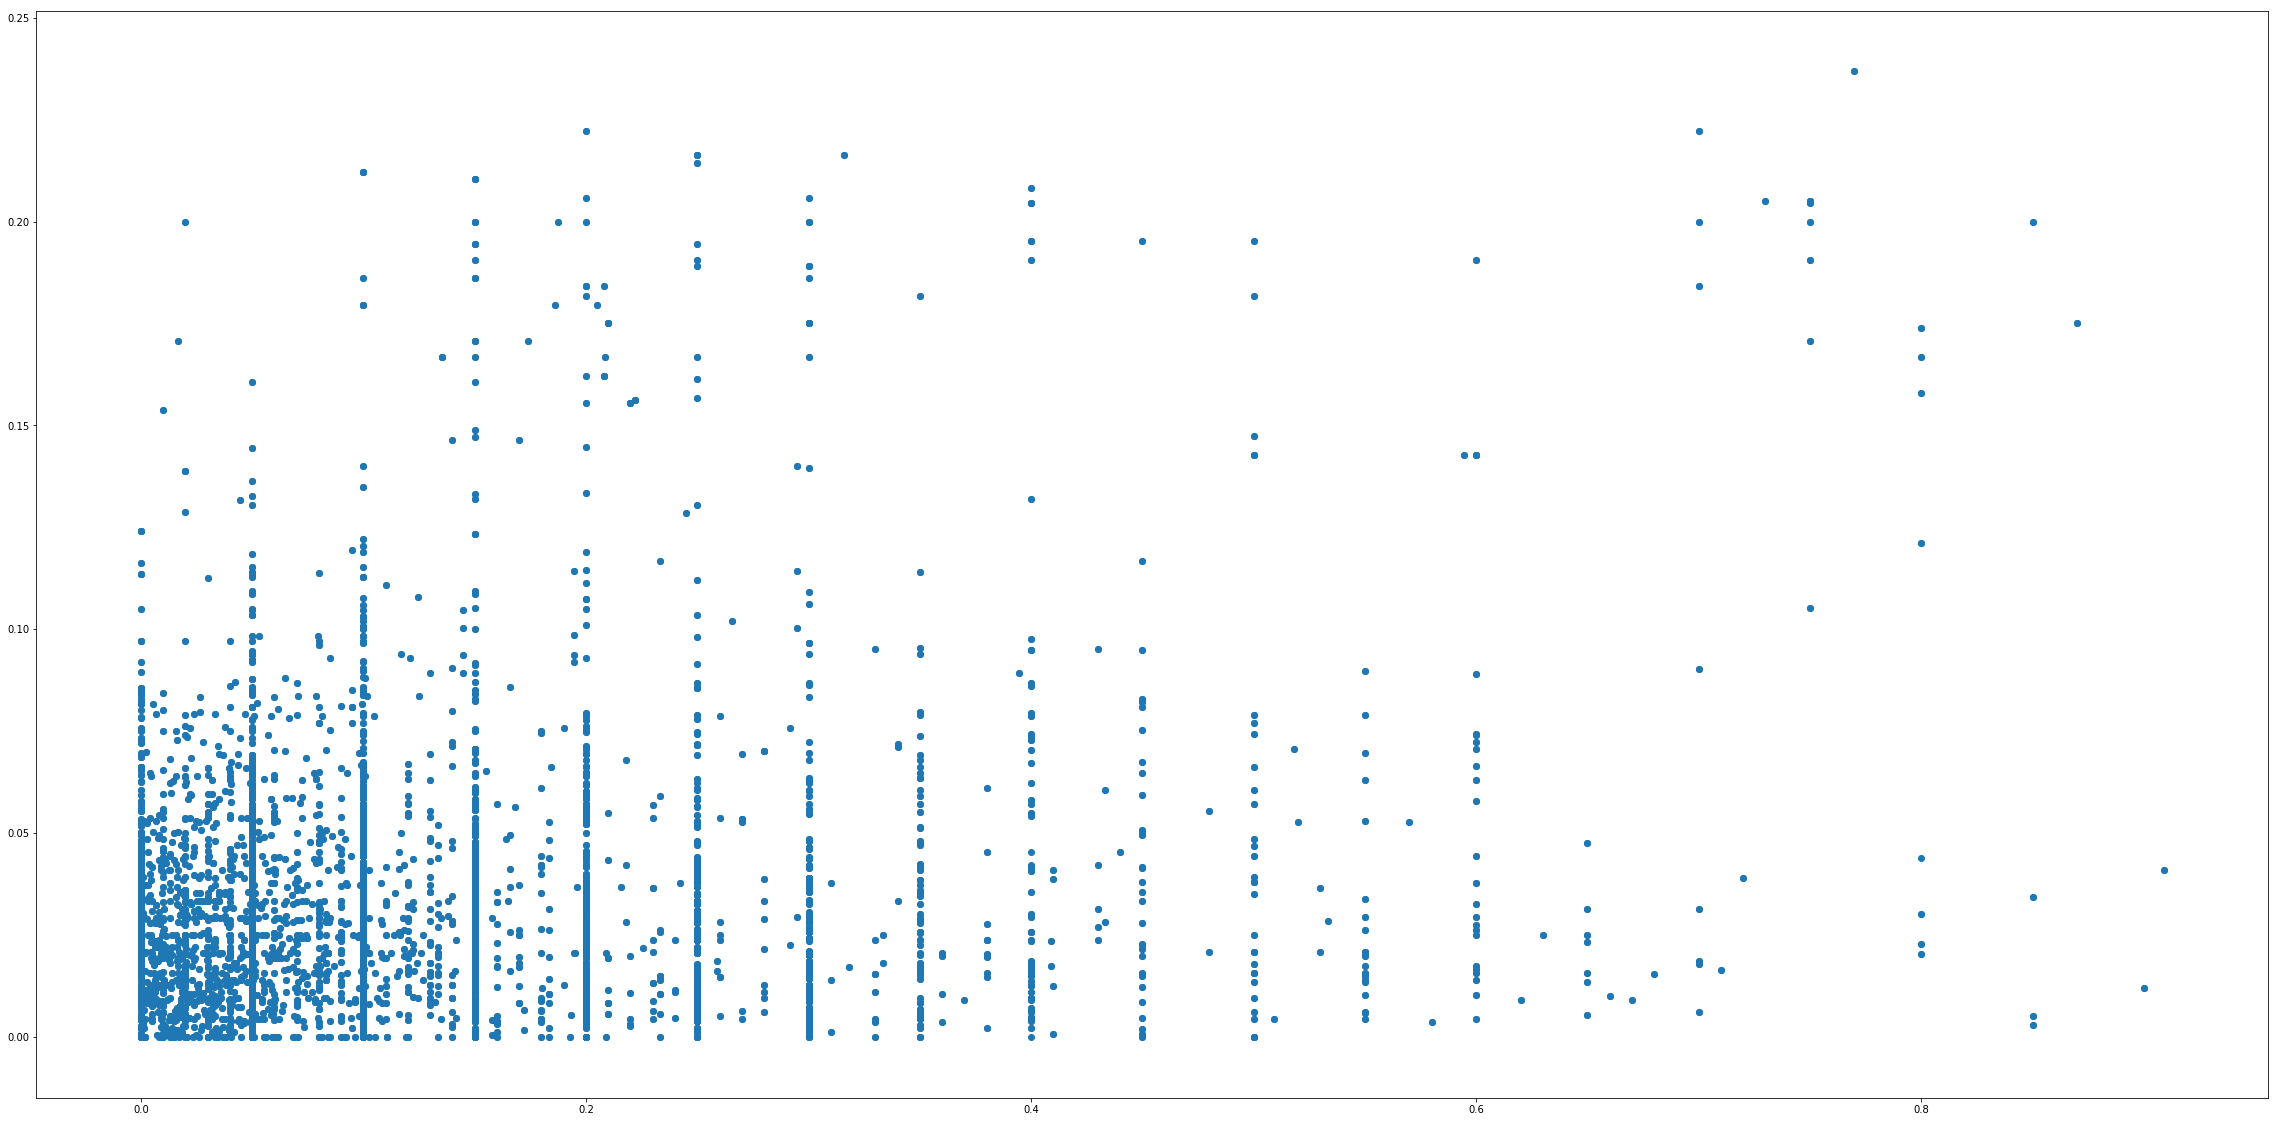

In [354]:
fig = plt.figure(figsize=(40,20))
plt.scatter(dis_imp_attr, dis_self_attr)
plt.show()

In [355]:
dis_imp_sinc = dating_data_self['dis_sinc']
dis_self_sinc = dating_data_self['dis_sinc_s']
r, p_value = pearsonr(dis_imp_sinc, dis_self_sinc)
r

0.30994446956182597

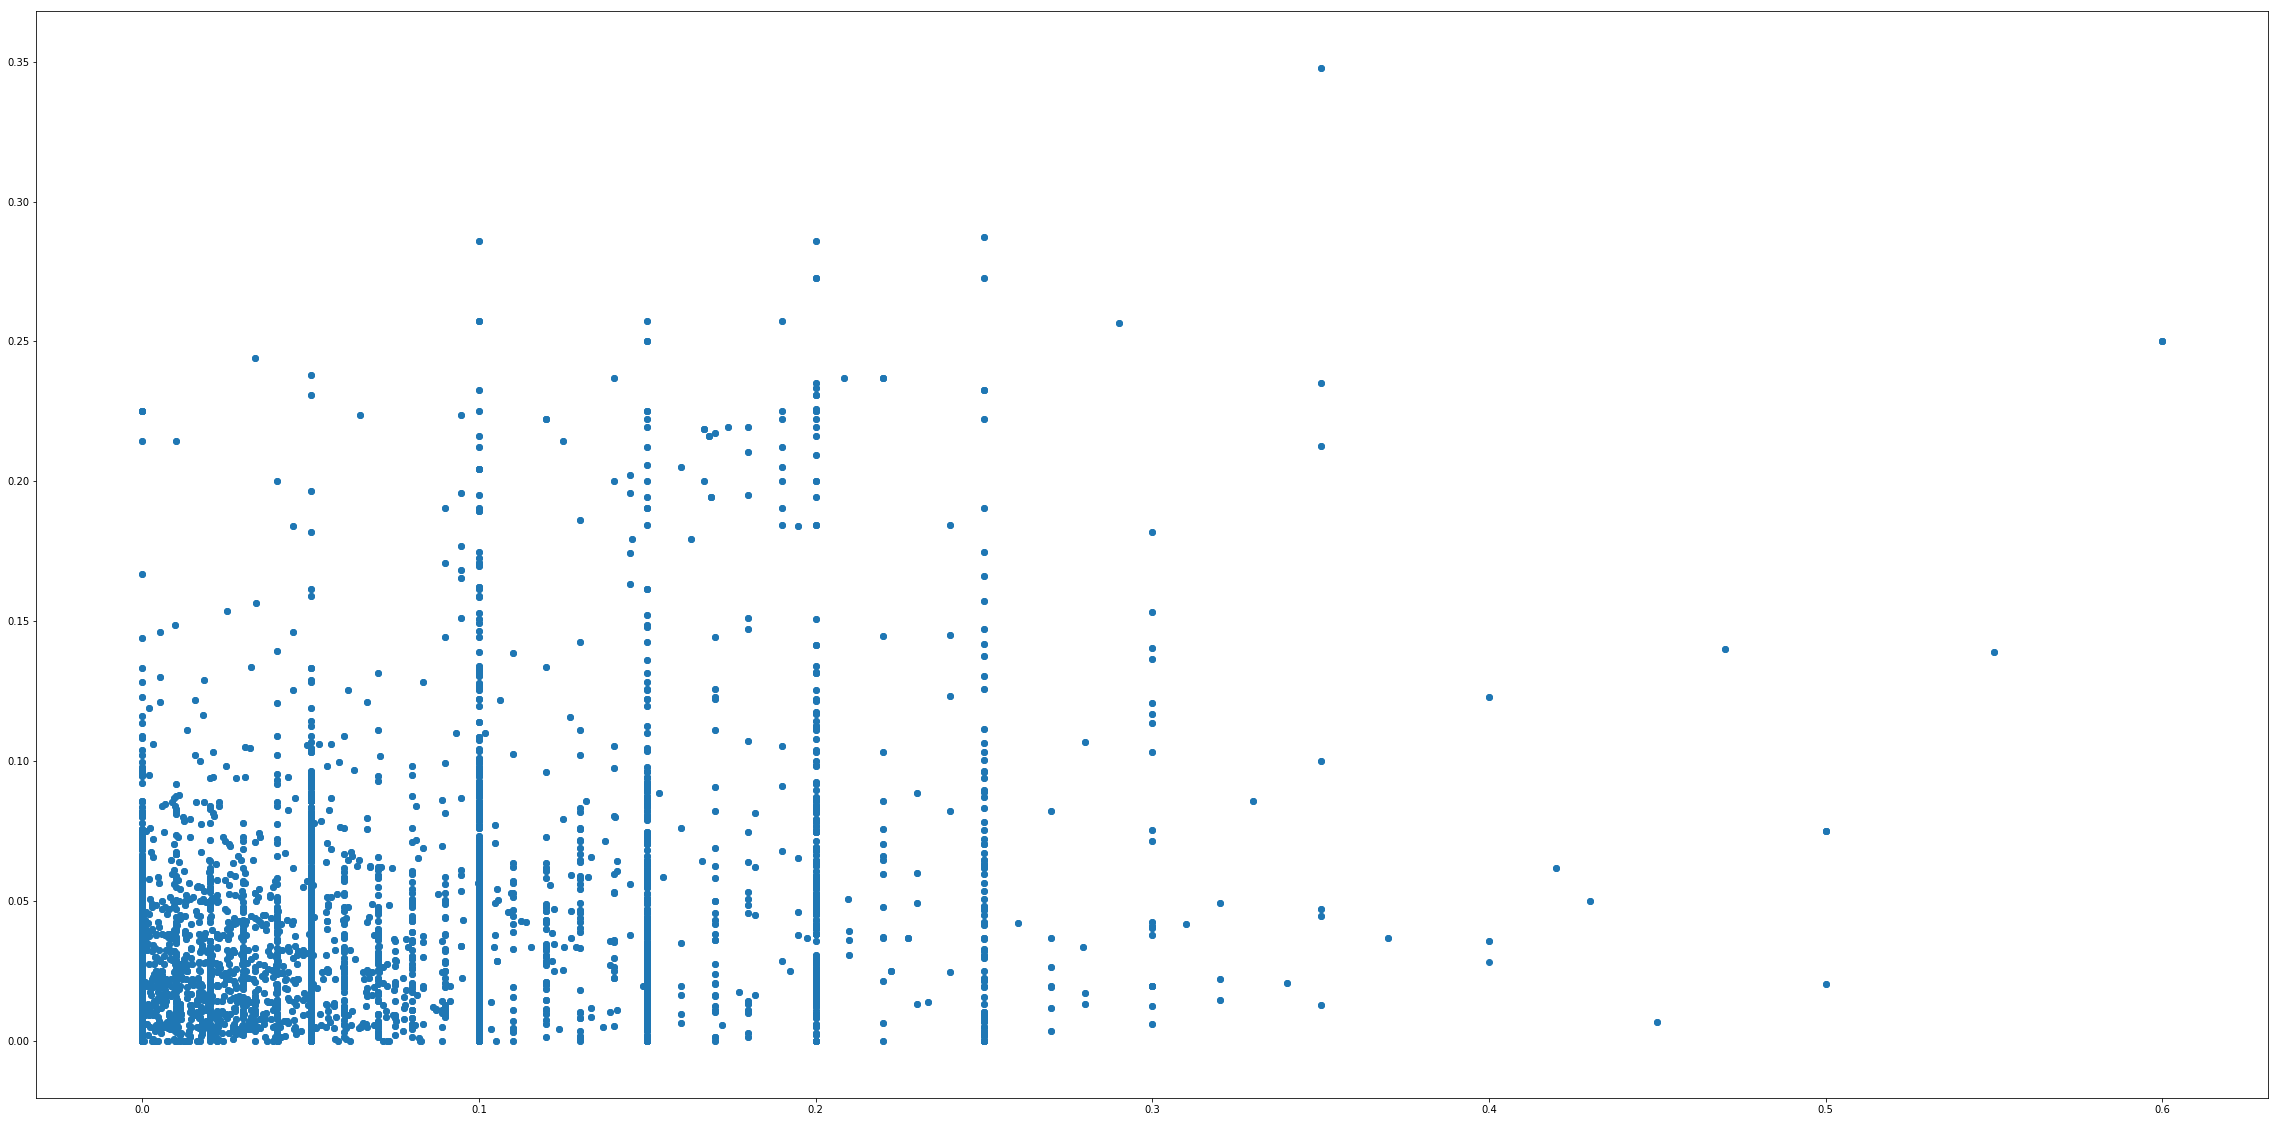

In [356]:
fig = plt.figure(figsize=(40,20))
plt.scatter(dis_imp_sinc, dis_self_sinc)
plt.show()

In [357]:
dis_imp_int = dating_data_self['dis_intel']
dis_self_int = dating_data_self['dis_intel_s']

In [358]:
r, p_value = pearsonr(dis_imp_int, dis_self_int)
r

0.26232617147958925

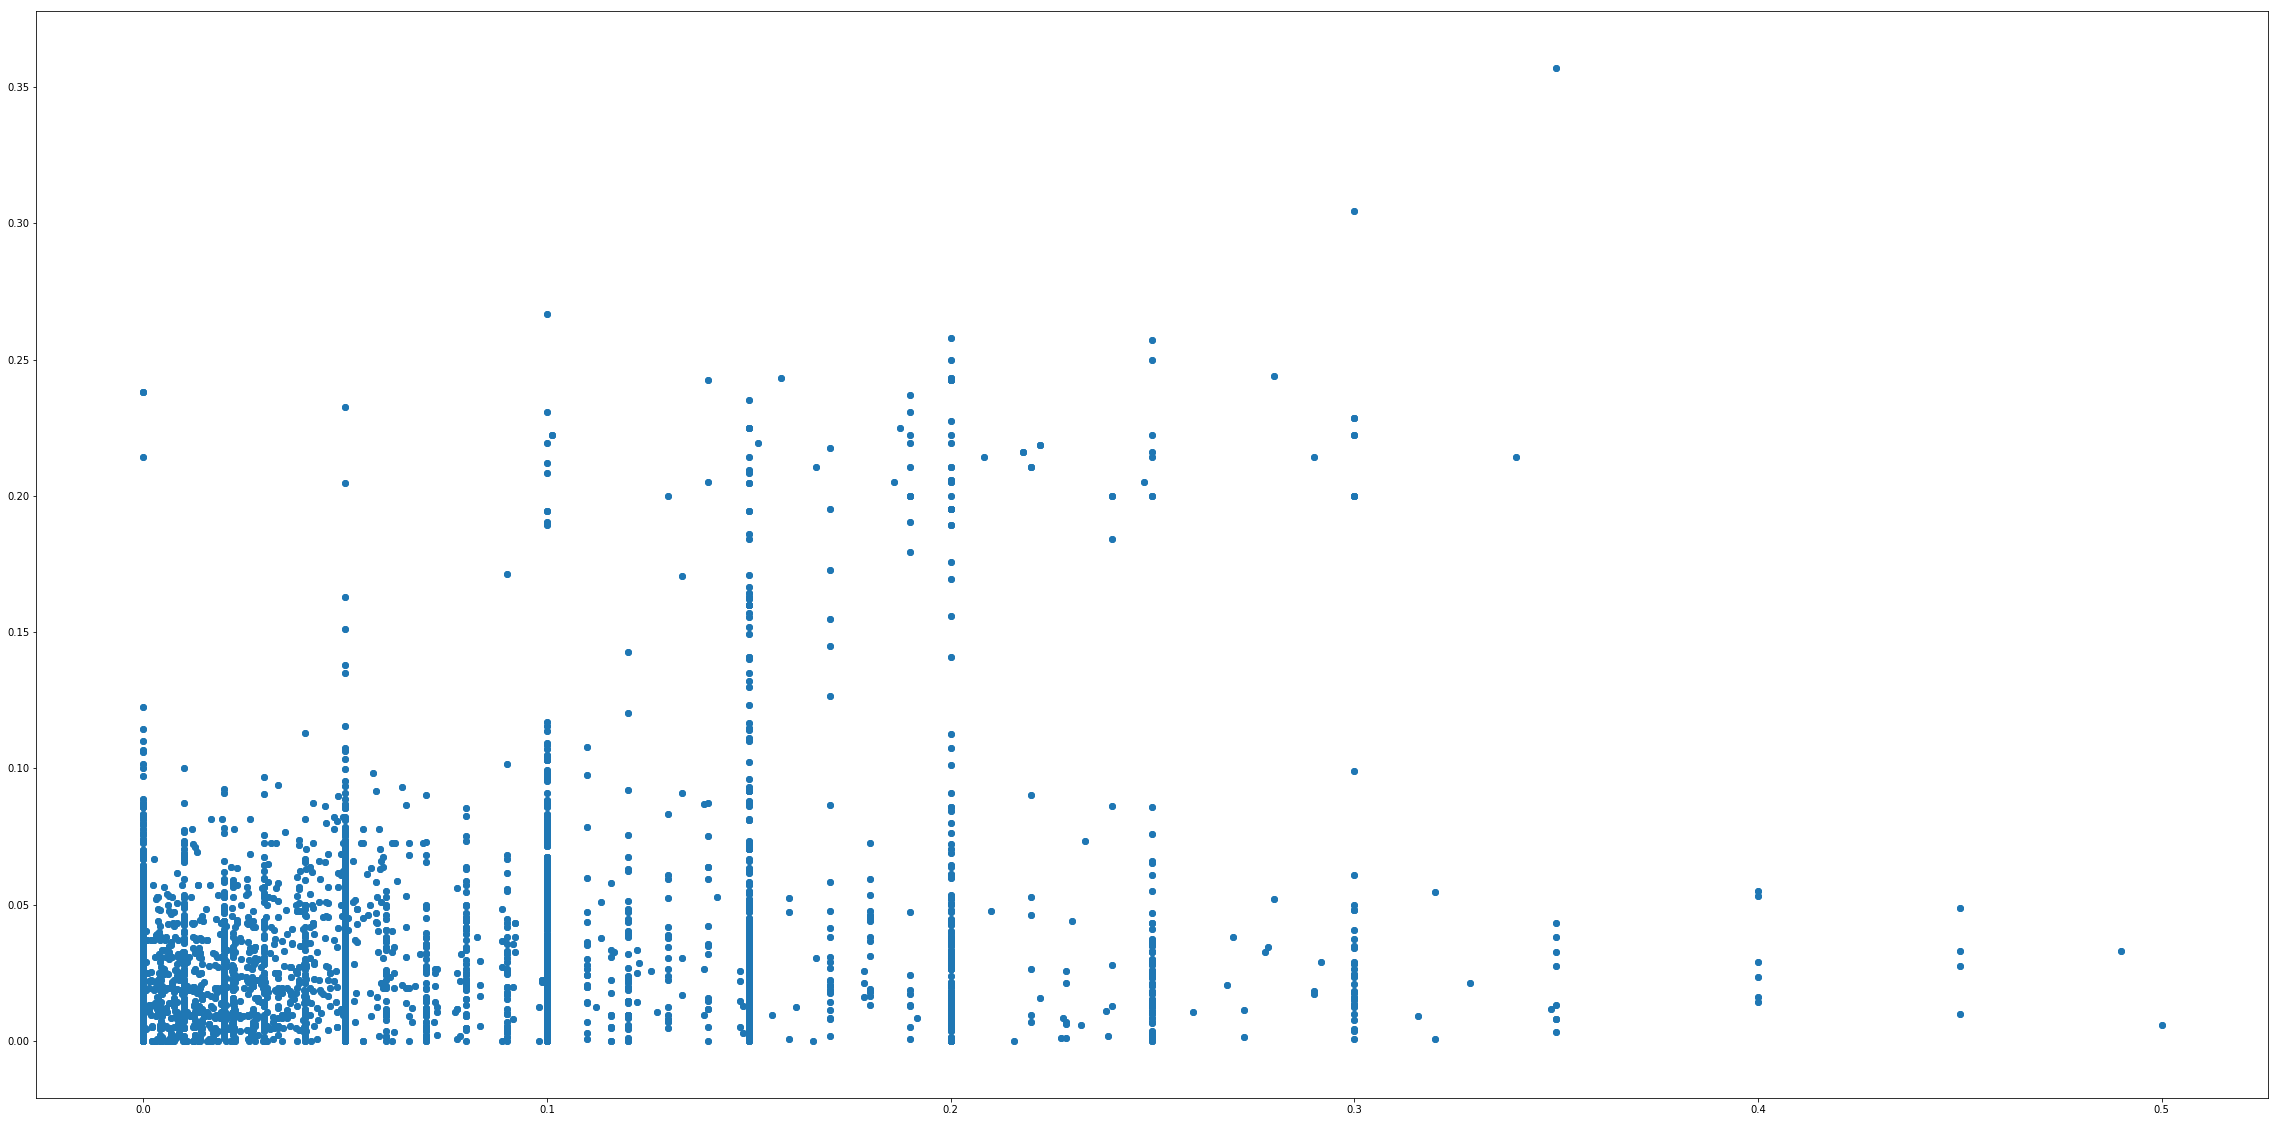

In [359]:
fig = plt.figure(figsize=(40,20))
plt.scatter(dis_imp_int, dis_self_int)
plt.show()

In [360]:
dis_imp_fun = dating_data_self['dis_fun']
dis_self_fun = dating_data_self['dis_fun_s']

In [361]:
r, p_value = pearsonr(dis_imp_fun, dis_self_fun)
r

0.24456190003210818

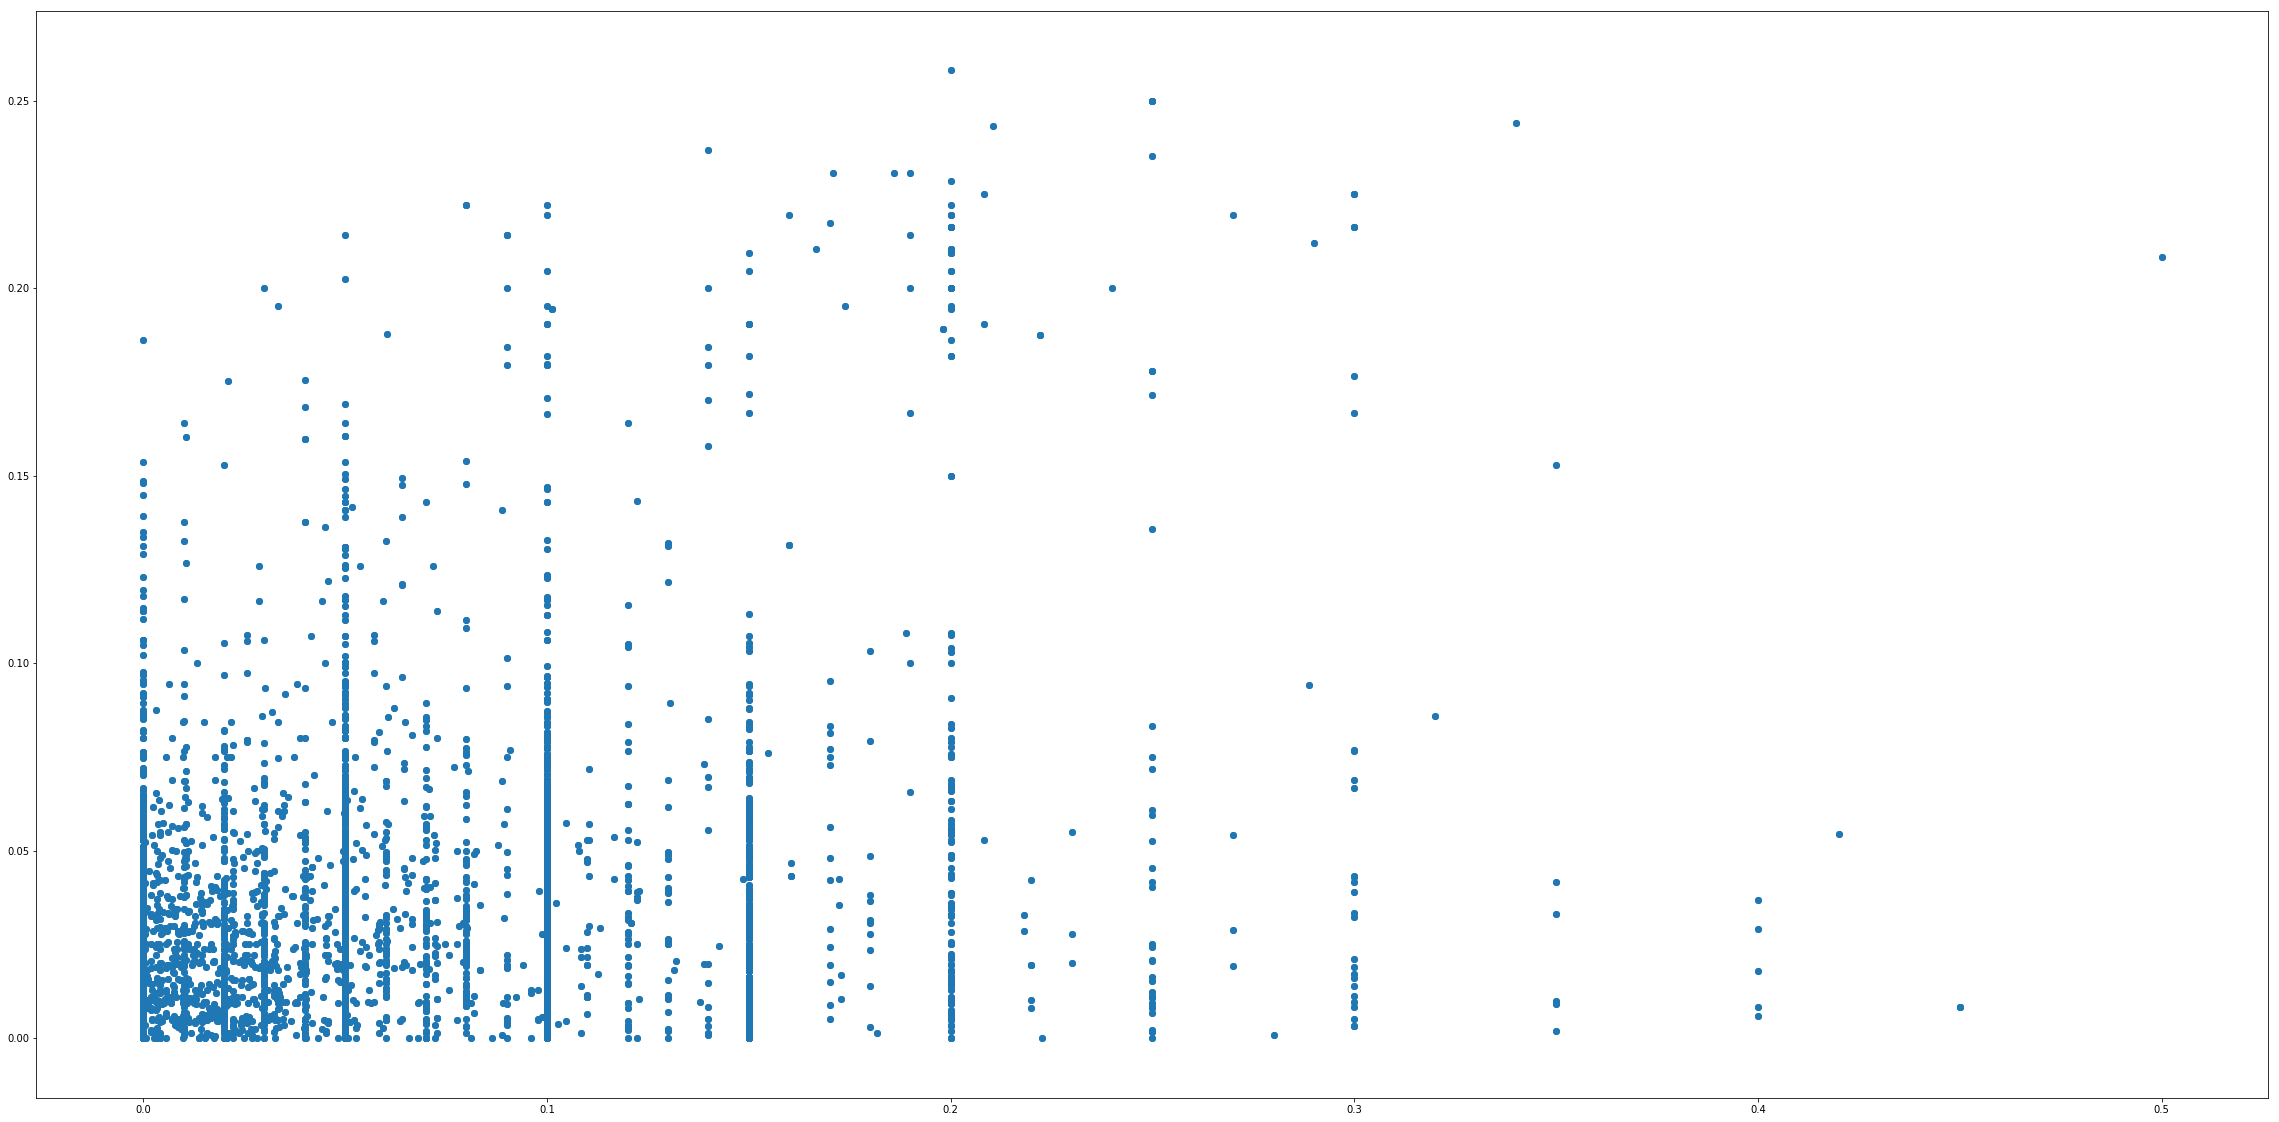

In [362]:
fig = plt.figure(figsize=(40,20))
plt.scatter(dis_imp_fun, dis_self_fun)
plt.show()

In [363]:
dis_imp_amb = dating_data_self['dis_amb']
dis_self_amb = dating_data_self['dis_amb_s']

In [364]:
r, p_value = pearsonr(dis_imp_amb, dis_self_amb)
r

0.11175163477173902

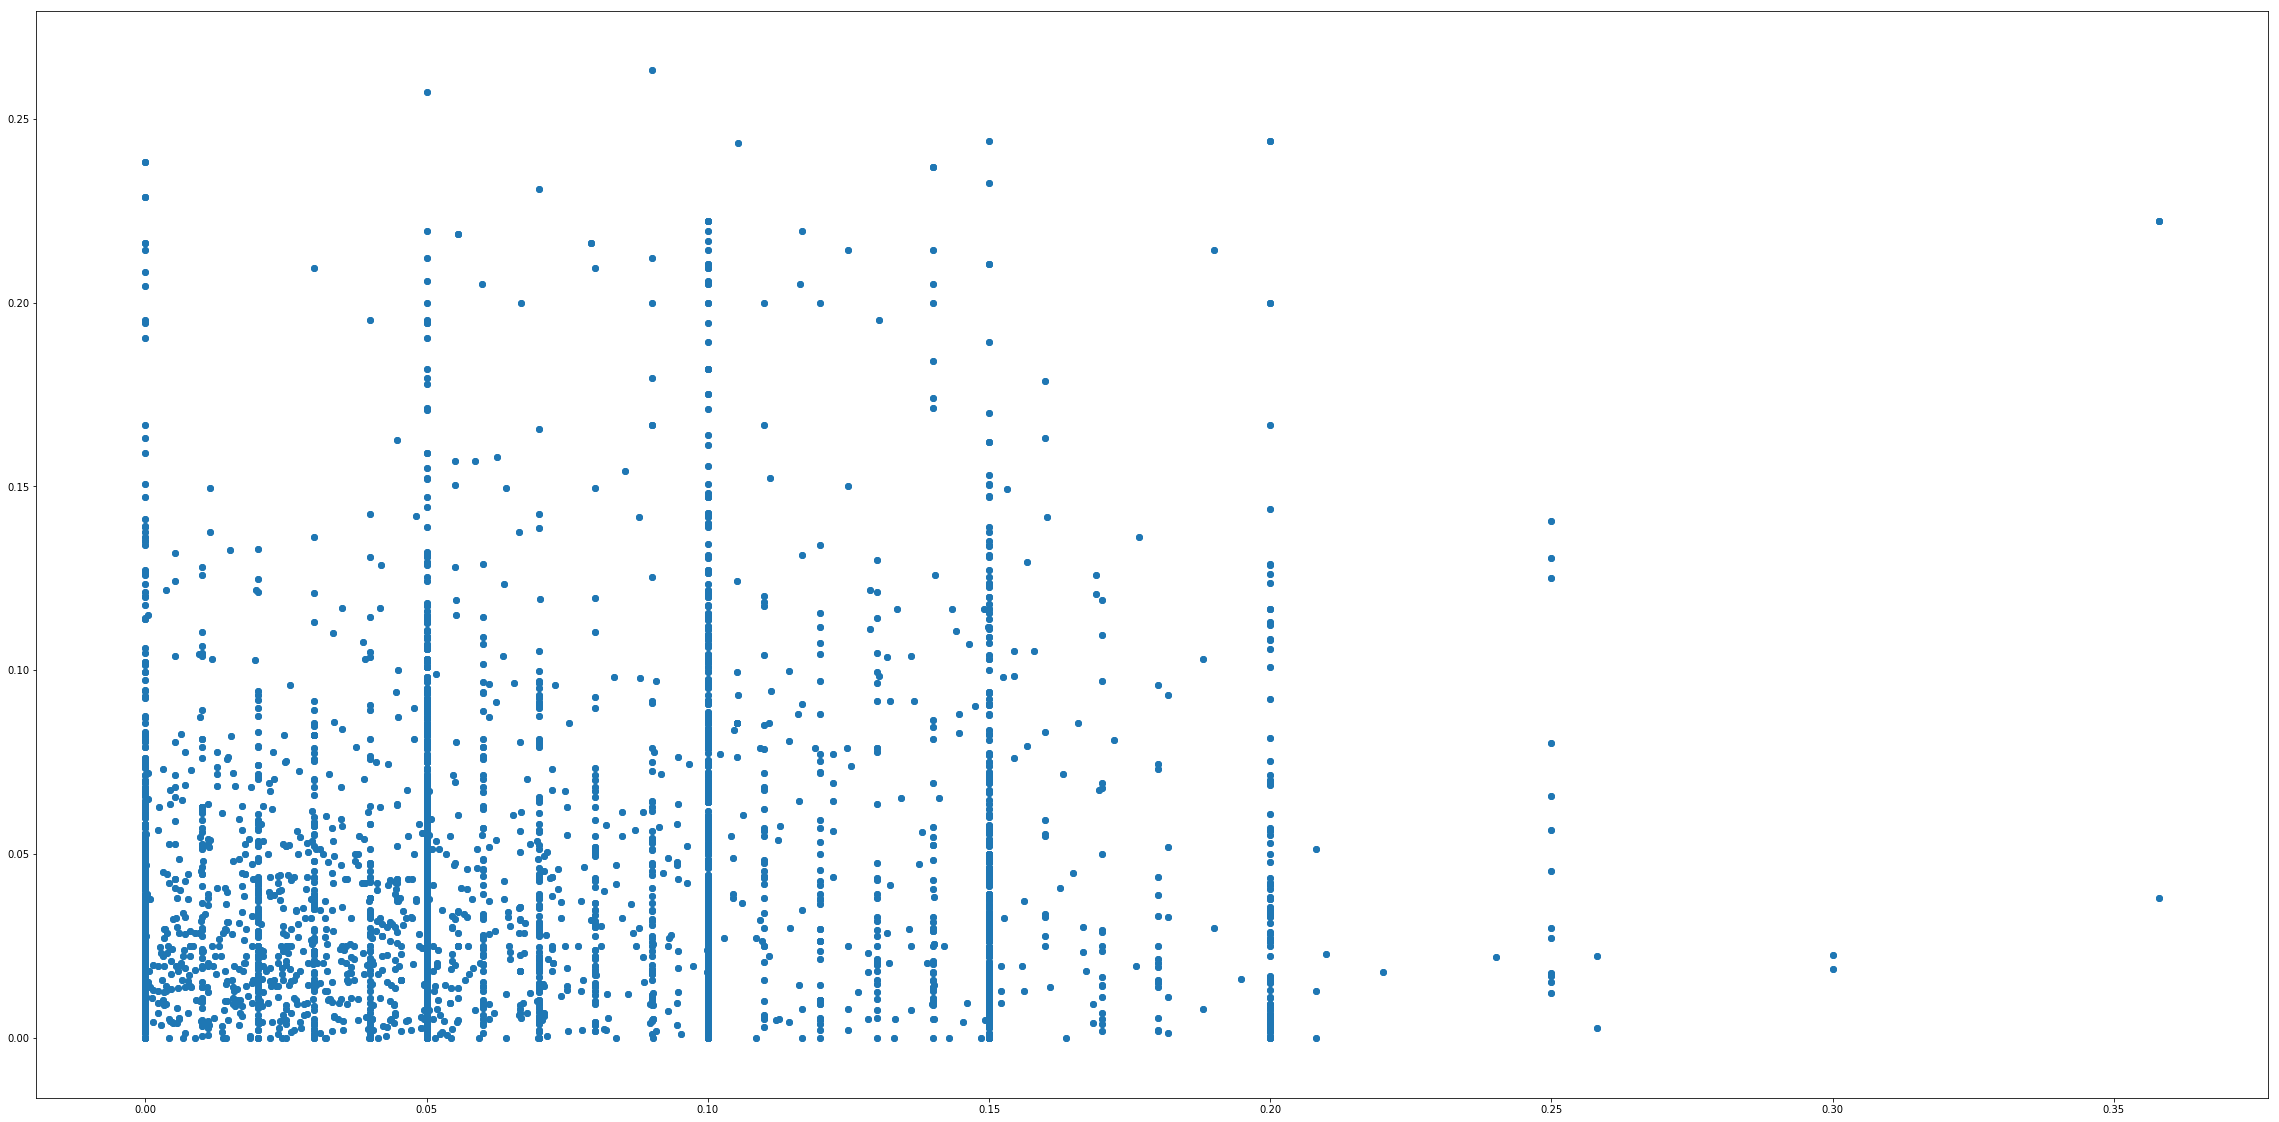

In [365]:
fig = plt.figure(figsize=(40,20))
plt.scatter(dis_imp_amb, dis_self_amb)
plt.show()